In [1]:
import pandas as pd

In [6]:
dataset = pd.read_csv('insurance .csv')

In [7]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [8]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [9]:
dataset.shape

(1338, 7)

In [10]:
dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [11]:
dataset['sex'] = dataset['sex'].map({"female": 0, "male": 1  })

In [12]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [13]:
def setLabel(str):
    if(str == "southeast" ):
        return 1
    elif (str == "southwest"):
        return 2
    elif (str == "northwest"):
        return 3
    else:
        return 4
dataset['region'] = dataset['region'].apply(setLabel)

In [14]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,2,16884.92
1,18,1,33.8,1,no,1,1725.55
2,28,1,33.0,3,no,1,4449.46
3,33,1,22.7,0,no,3,21984.47
4,32,1,28.9,0,no,3,3866.86


In [15]:
dataset['smoker'] = dataset['smoker'].map({"no": 0, "yes": 1  })

In [16]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,2,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


In [17]:
X = dataset.drop(columns=["expenses"])

In [18]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,2
1,18,1,33.8,1,0,1
2,28,1,33.0,3,0,1
3,33,1,22.7,0,0,3
4,32,1,28.9,0,0,3


In [20]:
Y = dataset['expenses']

In [21]:
import seaborn as sns

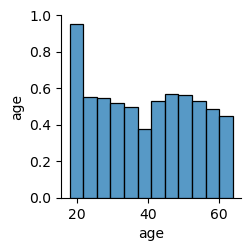

In [22]:
sns.pairplot(pd.DataFrame(dataset['age'] ))

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=48, test_size=0.2)

In [26]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(x_test)

In [28]:
y_pred

array([ 3879.69349835,  6811.18961458,  5036.92124588,  5409.1186193 ,
        2594.78359033,  5800.23732888, 30121.30688325, 11542.56144966,
       11700.07313278,  8641.19355612, 13366.12353814,  1270.71341456,
        5369.74069852,  2763.55299909, 12008.02162351, 12881.90068491,
       10950.88165513, 28467.30671748,  8888.11511877, 12036.8939317 ,
        7813.59868509, 14378.05008549, 10983.69238839,  8008.41601779,
        8632.26589287,   989.48891733,  3745.66338994, 14675.46096374,
        2111.94536461,  5980.64394624, 28073.76404036,  4867.54814943,
        2884.63705074,  8683.93713561,  -715.92394815, 11370.0961902 ,
        3366.42155435,  2087.96788147, 10370.47453893, 34366.63216826,
        5694.93924152,  6481.44527772, 10099.85006742, 25191.25614833,
       33995.85750437,  9906.0814533 , 11165.0074372 , -1485.09207063,
       33512.72924371,  6141.84257108,  8902.11438967,  6693.64407926,
         -76.14731366, 11805.16851976, 12943.67813949,  4971.66927477,
      

In [29]:
y_test

451      4032.24
1174     4433.92
213      5002.78
174      2855.44
648      1712.23
          ...   
42       6272.48
782      9386.16
859     10965.45
1260     4544.23
1224     6858.48
Name: expenses, Length: 268, dtype: float64

In [30]:
from sklearn.metrics import r2_score

In [32]:
r2 = r2_score(y_test, y_pred)

In [33]:
r2

0.7539741678399443

In [34]:
n = x_test.shape[0]
p = x_test.shape[1]

adjusted_r2 = 1 - (((1-r2)*(n -1))/(n-p-1))
adjusted_r2

0.7483184015833914

In [35]:
X['age-smoker'] = X['smoker']*X['age']

In [36]:
X.head()

,age,sex,bmi,children,smoker,region,age-smoker
0,19,0,27.9,0,1,2,19
1,18,1,33.8,1,0,1,0
2,28,1,33.0,3,0,1,0
3,33,1,22.7,0,0,3,0
4,32,1,28.9,0,0,3,0


In [36]:
X['child-smoke'] = X['smoker']*X['children']

In [37]:
X['bmi-smoker'] = X['bmi']*X['smoker']

In [39]:
X.head()

,age,sex,bmi,children,smoker,region,age-smoker
0,19,0,27.9,0,1,2,19
1,18,1,33.8,1,0,1,0
2,28,1,33.0,3,0,1,0
3,33,1,22.7,0,0,3,0
4,32,1,28.9,0,0,3,0


In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=48, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


r2 = r2_score(y_test, y_pred)

n = x_test.shape[0]
p = x_test.shape[1]

adjusted_r2 = 1 - (((1-r2)*(n -1))/(n-p-1))
adjusted_r2

print(f"r2 = {r2}  ,and  adjusted_r2 = {adjusted_r2}")


r2 = 0.7546313335439315  ,and  adjusted_r2 = 0.7480252540624219
